In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=r'data/stud.csv'

In [3]:
dataframe=pd.read_csv(dataset)

In [4]:
dataframe.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [5]:
df=dataframe

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

no missing values , no duplicate values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [32]:
#Analyzing unique values for each column
df['gender'].value_counts().values

array([518, 482])

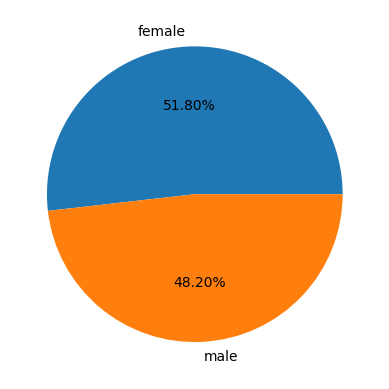

In [36]:
plt.pie(x=df['gender'].value_counts().values,labels=df['gender'].value_counts().index,autopct='%1.2f%%')
plt.show()

In [22]:
df['race_ethnicity'].value_counts().size

5

<BarContainer object of 5 artists>

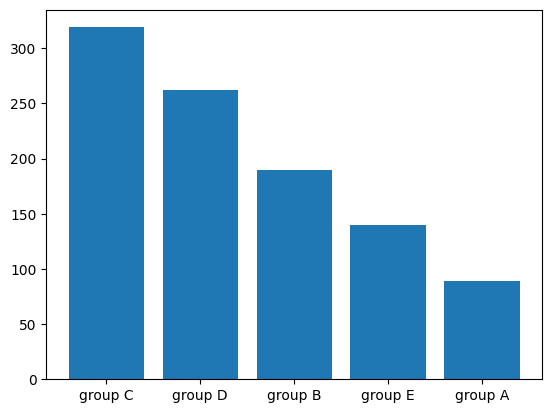

In [38]:
plt.bar(df['race_ethnicity'].value_counts().index,df['race_ethnicity'].value_counts().values)

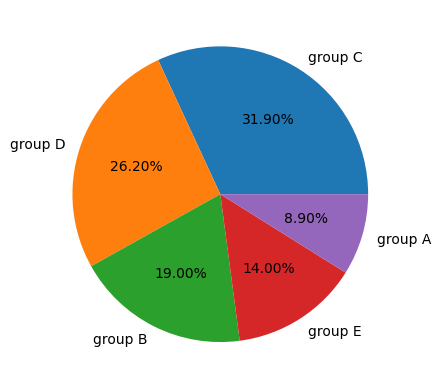

In [39]:
plt.pie(x=df['race_ethnicity'].value_counts().values,labels=df['race_ethnicity'].value_counts().index,autopct='%1.2f%%')
plt.show()

In [21]:
df['parental_level_of_education'].value_counts().size

6

In [23]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

<BarContainer object of 6 artists>

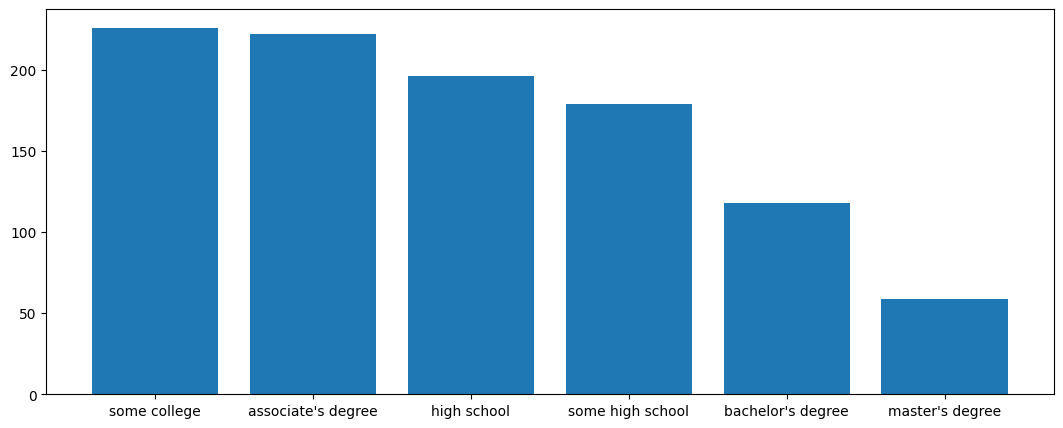

In [44]:
plt.figure(figsize=(13,5))
plt.bar(df['parental_level_of_education'].value_counts().index,df['parental_level_of_education'].value_counts().values)


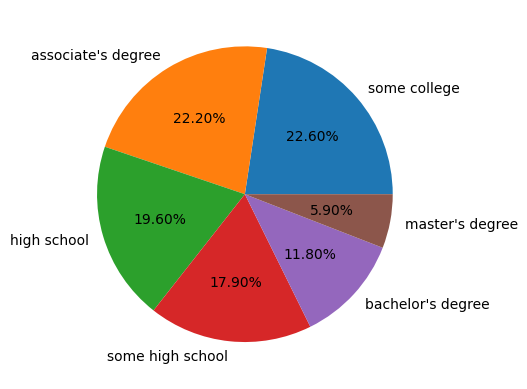

In [45]:
plt.pie(x=df['parental_level_of_education'].value_counts().values,labels=df['parental_level_of_education'].value_counts().index,autopct='%1.2f%%')
plt.show()

In [47]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [48]:
#numerical variable and categorical variable
numerical_values=[f for f in df.columns if df[f].dtype !='O']
categorical_values=[f for f in df.columns if df[f].dtype=='O']

In [49]:
print(numerical_values)

['math_score', 'reading_score', 'writing_score']


In [50]:
print(categorical_values)

['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [51]:
df['Total_Scores']=df['math_score']+df['reading_score']+df['writing_score']

In [52]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Scores
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247


In [53]:
df['Average_Scores']=df['math_score']+df['reading_score']+df['writing_score']//3

In [54]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Scores,Average_Scores
0,female,group B,bachelor's degree,standard,none,72,72,74,218,168
1,female,group C,some college,standard,completed,69,90,88,247,188


In [55]:
df['math_score'].max()

np.int64(100)

In [74]:
df['Total_Scores'].describe()

count    1000.000000
mean      203.312000
std        42.771978
min        27.000000
25%       175.000000
50%       205.000000
75%       233.000000
max       300.000000
Name: Total_Scores, dtype: float64

In [81]:
df.nlargest(5,'Total_Scores')

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Scores,Average_Scores
458,female,group E,bachelor's degree,standard,none,100,100,100,300,233
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,233
962,female,group E,associate's degree,standard,none,100,100,100,300,233
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,232
179,female,group D,some high school,standard,completed,97,100,100,297,230


In [88]:
df[df['math_score']==100].count()['math_score']

np.int64(7)

In [89]:
df[df['reading_score']==100].count()['math_score']

np.int64(17)

In [90]:
df[df['writing_score']==100].count()['math_score']

np.int64(14)

In [91]:
import seaborn as sns

<Axes: xlabel='Average_Scores', ylabel='Count'>

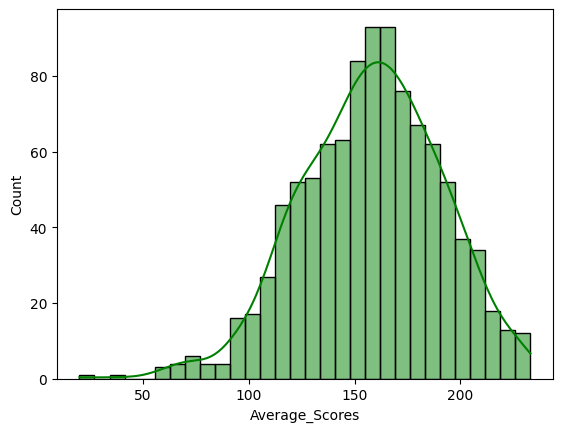

In [98]:
sns.histplot(data=df,x='Average_Scores',bins=30,kde=True,color='g')

<Axes: xlabel='Average_Scores', ylabel='Count'>

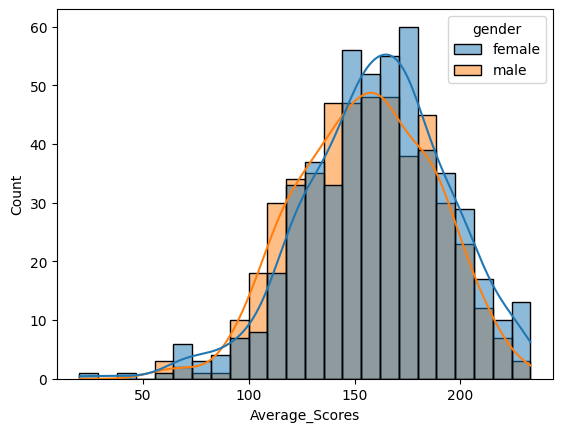

In [106]:
sns.histplot(data=df,x='Average_Scores',kde=True,hue='gender')

<Axes: xlabel='Total_Scores', ylabel='Count'>

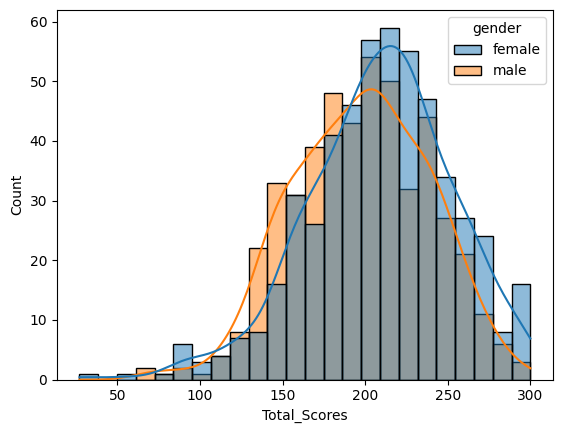

In [107]:
sns.histplot(data=df,x='Total_Scores',kde=True,hue='gender')